In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [5]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

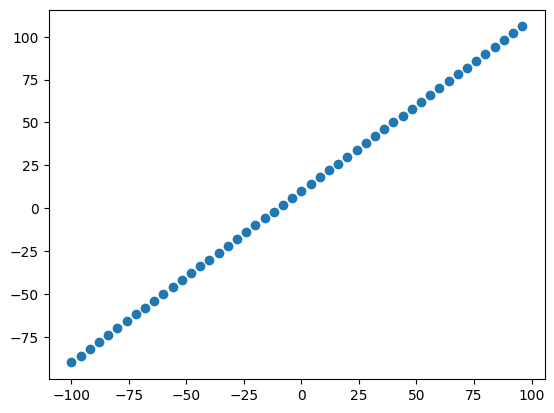

In [6]:
plt.scatter(X,y)

In [7]:
len(X)

50

In [8]:
X_train = X[:40] #first 40/50
y_train = y[:40] #first 40/50
X_test = X[40:]  #last  10/50
y_test = y[40:]  #last  10/50
X_train, X_test
len(X_train), len(X_test), len(y_train),len(y_test)

(40, 10, 40, 10)

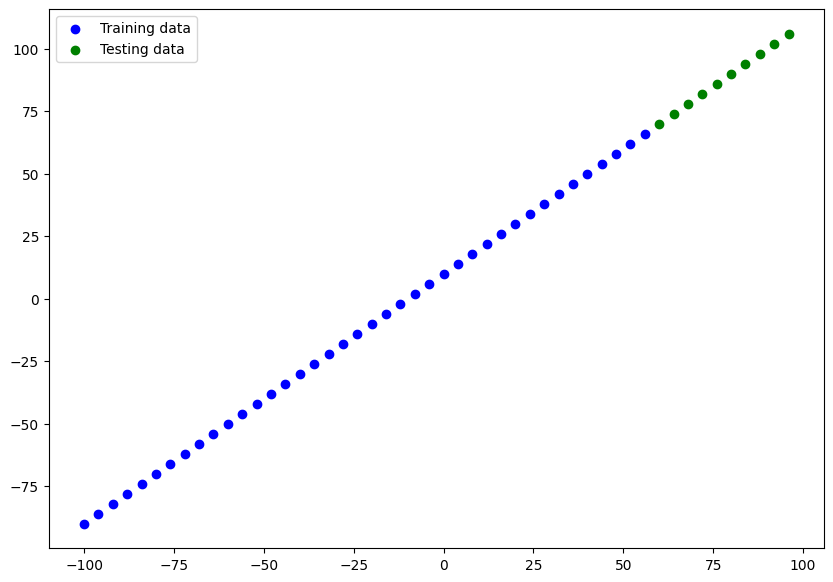

In [9]:
plt.figure(figsize=(10,7))
#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

plt.scatter(X_test, y_test, c="g", label="Testing data")
#show a legend
plt.legend();

In [10]:
#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. compile the model
model.compile (loss = tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated

model.build()


Epoch 1/100
2/2 [==============================] - 1s 23ms/step - loss: 118.6868 - mae: 118.6868
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 68.9410 - mae: 68.9410
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 23.0806 - mae: 23.0806
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 9.8141 - mae: 9.8141
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 10.2164 - mae: 10.2164
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 9.8731 - mae: 9.8731
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.7766 - mae: 9.7766
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 11.1678 - mae: 11.1678
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 9.7771 - mae: 9.7771
Epoch 10/100
2/2 [==============================] - 0s 17ms/step - loss: 10.7099 - mae: 10.7099
Epoch 11/100
2/2 [==============================] - 0s 9m

In [11]:
#Set random seed
tf.random.set_seed(42)
# 1. create a model using the Sequential Api
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,
    input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model error
#model.fit(X,y, epochs=5)

model.summary()

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 1s 16ms/step - loss: 29.2843 - mae: 29.2843
Epoch 2/100
2/2 [==============================] - 0s 20ms/step - loss: 13.2745 - mae: 13.2745
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 18.3099 - mae: 18.3099
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 10.0975 - mae: 10.0975
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 15.5828 - mae: 15.5828
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 11.918

In [12]:
def plot_predictions( train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_test ):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data" )
  plt.scatter(test_data, predictions, c="r",label="Predictions")
  plt.legend();



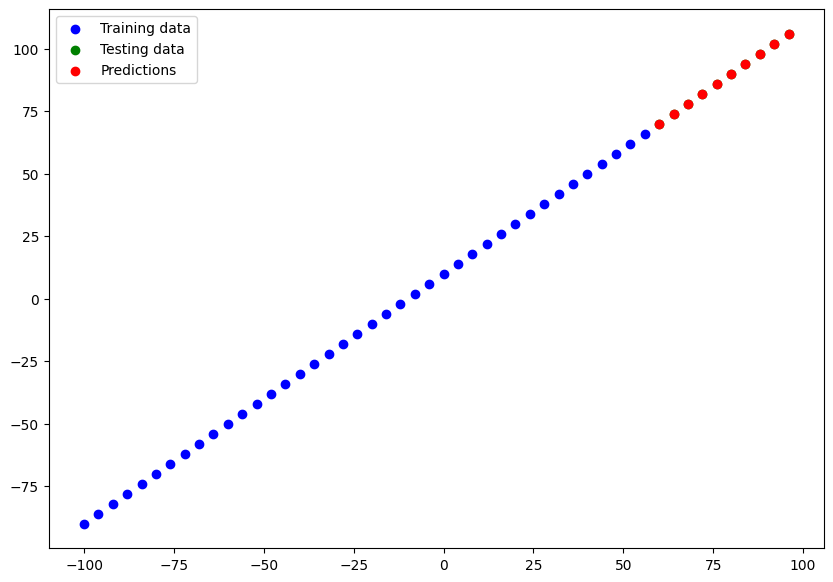

In [13]:
plot_predictions()
